In [1]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# get data files
train_file_path = "train-data.tsv"
test_file_path = "valid-data.tsv"
train_df = pd.read_table(train_file_path,
                         names=['class', 'text'],
                         dtype={'text': str})
test_df = pd.read_table(train_file_path,
                         names=['class', 'text'],
                         dtype={'text': str})

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x_train, y_train = train_df.drop(['class'], axis=1), le.fit_transform(train_df['class'])
x_test, y_test = test_df.drop(['class'], axis=1), le.fit_transform(train_df['class'])

In [4]:
train_df.tail()

,class,text
4174,ham,just woke up. yeesh its late. but i didn't fal...
4175,ham,what do u reckon as need 2 arrange transport i...
4176,spam,free entry into our £250 weekly competition ju...
4177,spam,-pls stop bootydelious (32/f) is inviting you ...
4178,ham,tell my bad character which u dnt lik in me. ...


In [5]:
# max_features = 5000
vectorizer = keras.layers.TextVectorization(
        standardize="lower_and_strip_punctuation",
        split="whitespace",
        output_mode='multi_hot',
        # max_tokens=max_features
        )
vectorizer.adapt(x_train)


In [6]:
model = keras.models.Sequential([
    keras.Input(shape=(vectorizer.vocabulary_size(),)),
    keras.layers.Dense(128 , activation='relu'),
    keras.layers.Dense(64 , activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

loss = keras.losses.BinaryCrossentropy()
optim = keras.optimizers.Adam(learning_rate=0.0002)
metrics = ['accuracy']

model.compile(loss=loss, optimizer=optim, metrics=metrics)

In [7]:
epochs=10
batch_size=64
history = model.fit(
    vectorizer(x_train), 
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,
    )

Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.6287 - loss: 0.6690 - val_accuracy: 0.8648 - val_loss: 0.5305
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8720 - loss: 0.4673 - val_accuracy: 0.9211 - val_loss: 0.3097
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9537 - loss: 0.2448 - val_accuracy: 0.9737 - val_loss: 0.1719
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9836 - loss: 0.1218 - val_accuracy: 0.9809 - val_loss: 0.1132
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9899 - loss: 0.0677 - val_accuracy: 0.9856 - val_loss: 0.0884
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9971 - loss: 0.0394 - val_accuracy: 0.9868 - val_loss: 0.0757
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9964 - loss: 0.0291 - val_accuracy: 0.9868 - val_loss: 0.0703
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9975 - loss: 0.0214 - val_accuracy: 0.9868 - v

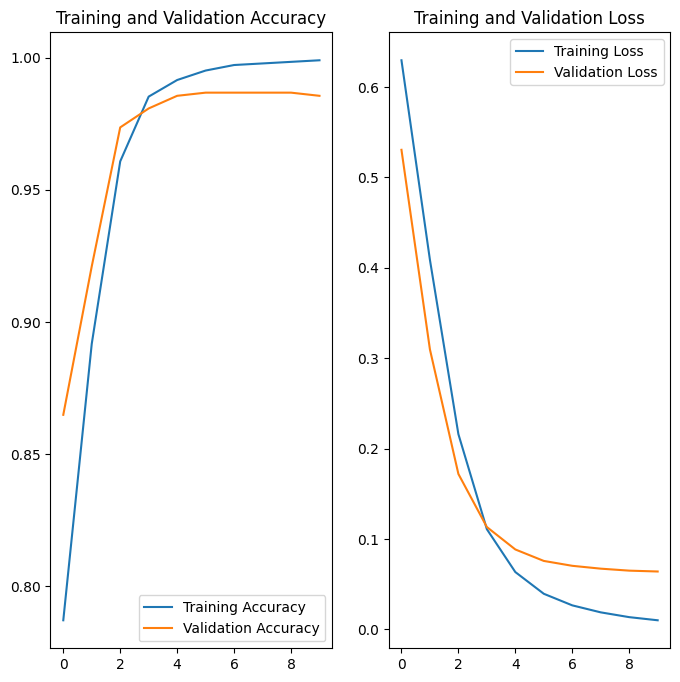

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [9]:
# function to predict messages based on model
# (should return list containing prediction and label, ex. [0.008318834938108921, 'ham'])
def predict_message(pred_text):
  prediction = model.predict(vectorizer([pred_text]))[:, 0]
  cat = le.inverse_transform((prediction > 0.5).astype("int32"))
  print(prediction, cat)
  return (prediction, cat)

pred_text = "how are you doing today?"

prediction = predict_message(pred_text)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
[0.0078348] ['ham']
(array([0.0078348], dtype=float32), array(['ham'], dtype=object))


In [10]:
# Run this cell to test your function and model. Do not modify contents.
def test_predictions():
  test_messages = ["how are you doing today",
                   "sale today! to stop texts call 98912460324",
                   "i dont want to go. can we try it a different day? available sat",
                   "our new mobile video service is live. just install on your phone to start watching.",
                   "you have won £1000 cash! call to claim your prize.",
                   "i'll bring it tomorrow. don't forget the milk.",
                   "wow, is your arm alright. that happened to me one time too"
                  ]

  test_answers = ["ham", "spam", "ham", "spam", "spam", "ham", "ham"]
  passed = True

  for msg, ans in zip(test_messages, test_answers):
    prediction = predict_message(msg)
    if prediction[1] != ans:
      passed = False

  if passed:
    print("You passed the challenge. Great job!")
  else:
    print("You haven't passed yet. Keep trying.")

test_predictions()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[0.0078348] ['ham']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[0.8406516] ['spam']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[0.00037459] ['ham']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[0.9697771] ['spam']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
[0.9946779] ['spam']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
[0.00399974] ['ham']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[0.00147739] ['ham']
You passed the challenge. Great job!
